In [30]:
import pandas as pd
import numpy as np
from collections import defaultdict
import nltk
import string
from nltk.stem.porter import *
from sklearn import linear_model
import sys
import unicodedata
import string
import operator
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from scipy import sparse
from scipy.spatial.distance import cosine
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import pickle

%matplotlib inline
# stdout = sys.stdout
# reload(sys)  
# sys.setdefaultencoding('utf8')
# sys.stdout = stdout

In [2]:
train_feats = np.load('train_feats_fulltrain_25_seeded.npy')
train_labels = np.load('train_labels_fulltrain_25_seeded.npy')

In [3]:
train_labels.shape

(322560,)

In [4]:
xgb1 = xgb.XGBClassifier(max_depth=14)
xgb1.fit(train_feats, train_labels)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=14,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [5]:
# xgb1 = pickle.load(open("xgb_lstm_14.pickle.dat", "rb"))

In [6]:
val_feats = np.load('val_feats_fulltrain_25_seeded.npy')
val_labels = np.load('val_labels_fulltrain_25_seeded.npy')

In [7]:
preds_train = xgb1.predict_proba(train_feats)
preds_val = xgb1.predict_proba(val_feats)

In [8]:
preds_train = preds_train[:,1]
preds_val = preds_val[:,1]

[[ 0.94512904  0.05487099]
 [ 0.9569633   0.04303672]
 [ 0.86021411  0.13978587]
 [ 0.24246949  0.75753051]
 [ 0.00159013  0.99840987]
 [ 0.61377442  0.38622555]
 [ 0.97231835  0.02768166]
 [ 0.9919771   0.0080229 ]
 [ 0.92035562  0.0796444 ]
 [ 0.99892604  0.00107396]]


In [9]:
thresh = 0.51
acc_train = np.mean(train_labels==(preds_train>thresh))
acc_val = np.mean(val_labels==(preds_val>thresh))

print 'Training accuracy: ', acc_train
print 'Validation accuracy: ', acc_val

Training accuracy:  0.993331473214
Validation accuracy:  0.823674841772


In [10]:
np.save('xgb_predicts.npy', preds_val)

In [27]:
average_precision = average_precision_score(val_labels, preds_val)

print('Average precision-recall score on validation data: {0:0.3f}'.format(
      average_precision))


Average precision-recall score on validation data: 0.851


In [28]:
fpr, tpr, thresholds = roc_curve(val_labels, preds_val, pos_label=1)
auc_ = auc(fpr, tpr)
print auc_

0.900608522889


In [35]:
np.save('fpr_xgb.npy',fpr)
np.save('tpr_xgb.npy',tpr)

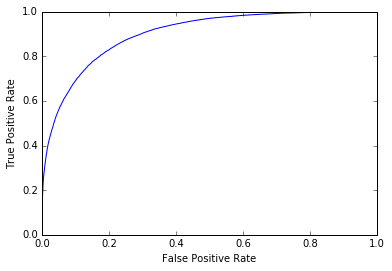

In [33]:
plt.clf()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.savefig('roc_xgb.PNG')

In [23]:
precision, recall, _ = precision_recall_curve(val_labels, preds_val)

plt.clf()
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.3f}'.format(
#           average_precision))
plt.savefig('precision_recall_xgb_lstm.PNG')

In [19]:
import pickle
pickle.dump(xgb1, open("xgb_lstm_14_seeded.pickle.dat", "wb"))

In [26]:
import sklearn
log_loss = sklearn.metrics.log_loss(val_labels, preds_val, eps=1e-15, normalize=True)
print (log_loss)

0.383139962438
